# Seaborn ve Matplotlib ile Pokemon Dataset Çalışması

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/Users/abdullahyunus/Desktop/Python Çalışmaları/datasets/pokemon.csv', sep = ';', index_col = 0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [8]:
df.info

<bound method DataFrame.info of            Name   Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  \
#                                                                        
1     Bulbasaur    Grass  Poison    318   45      49       49       65   
2       Ivysaur    Grass  Poison    405   60      62       63       80   
3      Venusaur    Grass  Poison    525   80      82       83      100   
4    Charmander     Fire     NaN    309   39      52       43       60   
5    Charmeleon     Fire     NaN    405   58      64       58       80   
..          ...      ...     ...    ...  ...     ...      ...      ...   
147     Dratini   Dragon     NaN    300   41      64       45       50   
148   Dragonair   Dragon     NaN    420   61      84       65       70   
149   Dragonite   Dragon  Flying    600   91     134       95      100   
150      Mewtwo  Psychic     NaN    680  106     110       90      154   
151         Mew  Psychic     NaN    600  100     100      100      100   

     

In [9]:
df['Name']

#
1       Bulbasaur
2         Ivysaur
3        Venusaur
4      Charmander
5      Charmeleon
          ...    
147       Dratini
148     Dragonair
149     Dragonite
150        Mewtwo
151           Mew
Name: Name, Length: 151, dtype: object

In [10]:
df['HP']

#
1       45
2       60
3       80
4       39
5       58
      ... 
147     41
148     61
149     91
150    106
151    100
Name: HP, Length: 151, dtype: int64

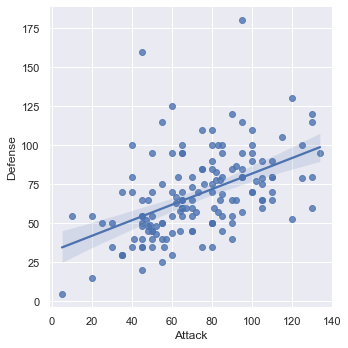

In [39]:
sns.lmplot(x='Attack', y='Defense', data=df)

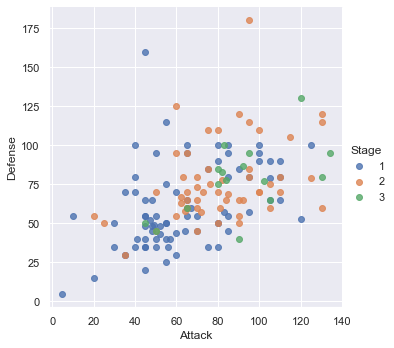

In [34]:
sns.lmplot(x = 'Attack', y = 'Defense', fit_reg = False, hue = 'Stage', data = df)

(0.0, 140.45)

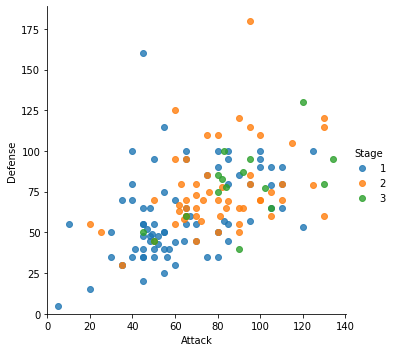

In [14]:
sns.lmplot(x='Attack', y='Defense', data=df,fit_reg=False,hue='Stage')
plt.ylim(0, None)
plt.xlim(0, None)

<AxesSubplot:>

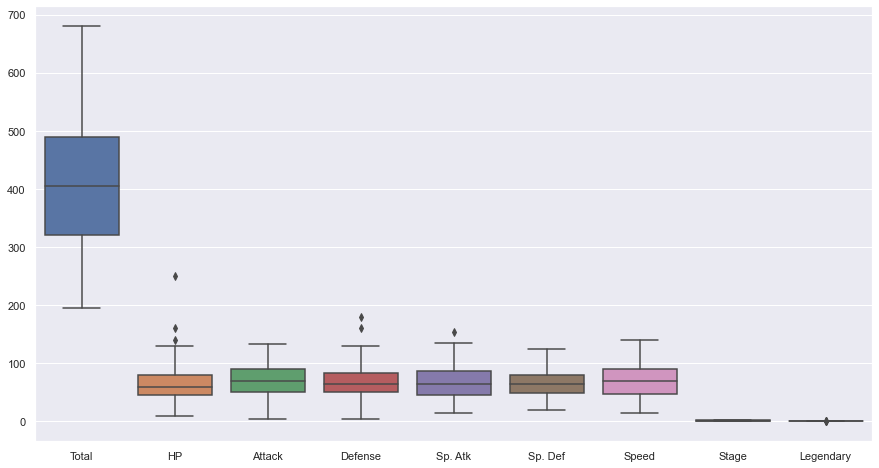

In [35]:
sns.set(rc = {'figure.figsize':(15,8)}) # Grafiklerin boyutunu ayarlamak için.
sns.boxplot(data = df)

<AxesSubplot:>

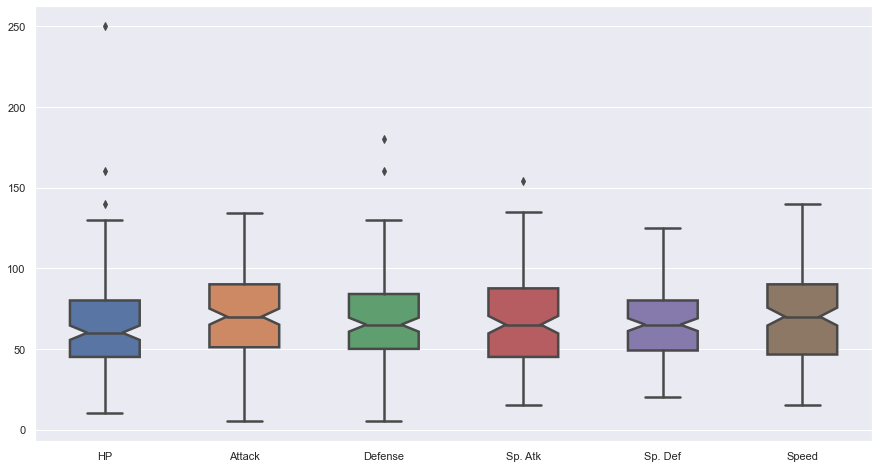

In [36]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis = 1)
sns.boxplot(data = stats_df, notch = True, linewidth = 2.5, width = 0.50)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

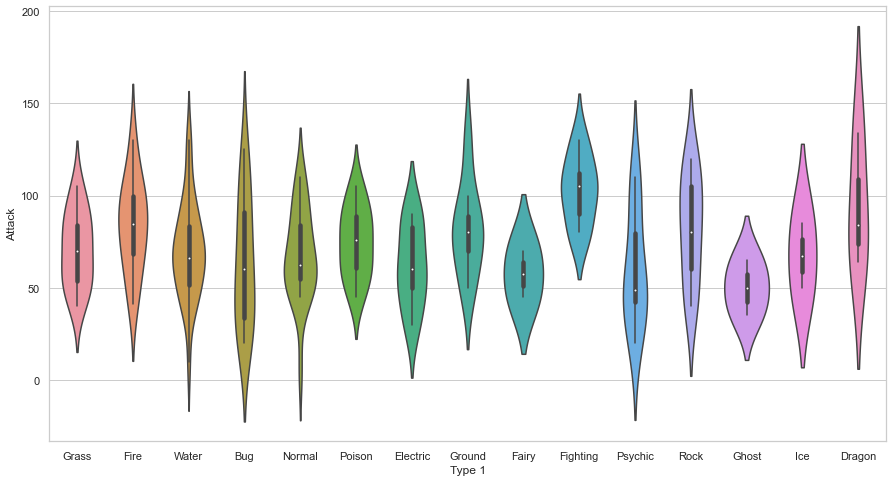

In [28]:
sns.set_style('whitegrid')
sns.violinplot(x = 'Type 1', y = 'Attack', data = df)

In [18]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

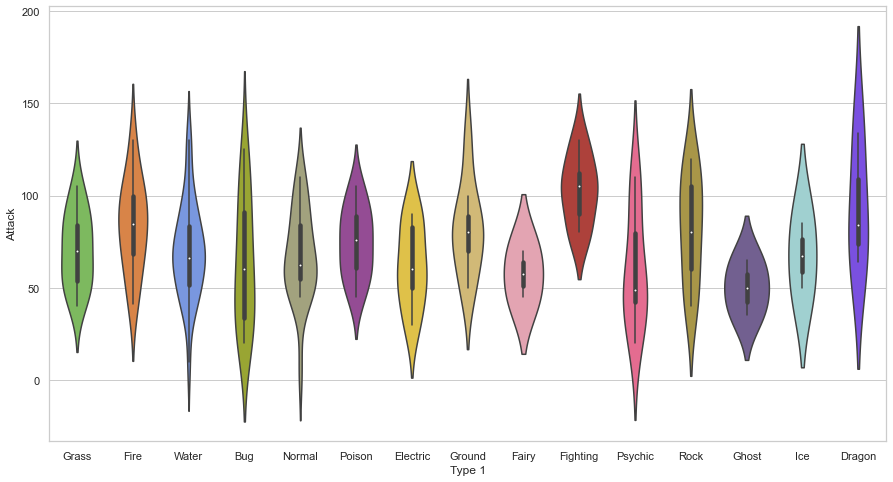

In [29]:
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

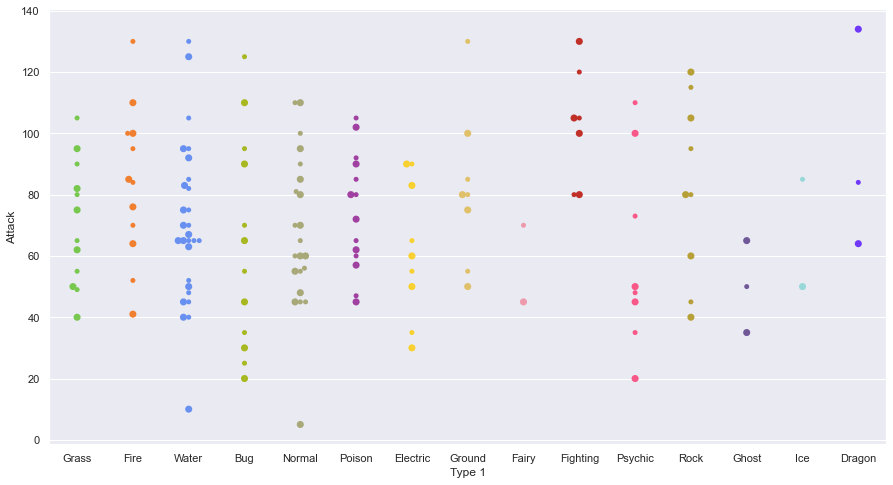

In [37]:
sns.swarmplot(x = 'Type 1', y = 'Attack', data = df, palette=pkmn_type_colors, sizes = (50,25))

Text(0.5, 1.0, 'Attack by Type')

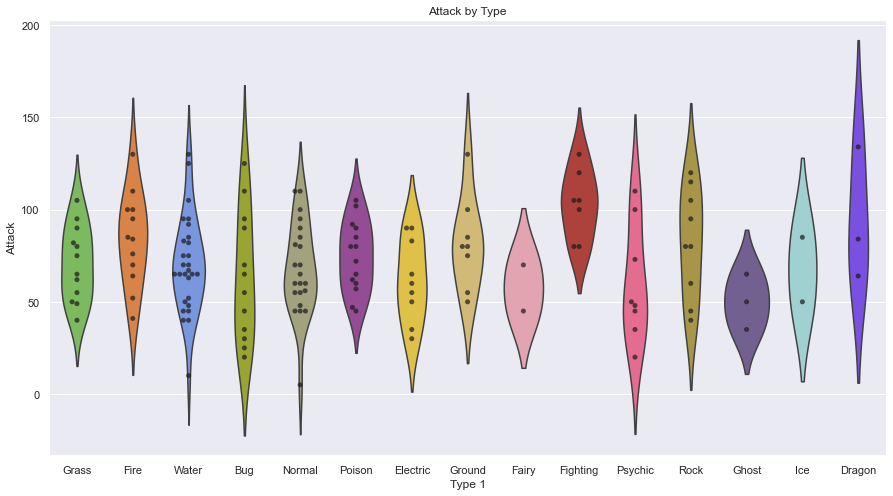

In [40]:
sns.violinplot(x = 'Type 1', y = 'Attack', data = df, inner = None, palette=pkmn_type_colors)
sns.swarmplot(x = 'Type 1', y = 'Attack', data = df, color = 'k', alpha = 0.7)
plt.title('Attack by Type')

In [41]:
melted_df = pd.melt(stats_df, id_vars=["Name", "Type 1", "Type 2"], var_name="Stat")
melted_df.head() # Tabloyu melt ederek daha az sütuna indirgedik. Satır sayısı arttı.

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [42]:
print(stats_df.shape)
print(melted_df.shape)

(151, 9)
(906, 5)


In [46]:
melted_df

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58
...,...,...,...,...,...
901,Dratini,Dragon,NaN,Speed,50
902,Dragonair,Dragon,NaN,Speed,70
903,Dragonite,Dragon,Flying,Speed,80
904,Mewtwo,Psychic,NaN,Speed,130


<AxesSubplot:xlabel='Stat', ylabel='value'>

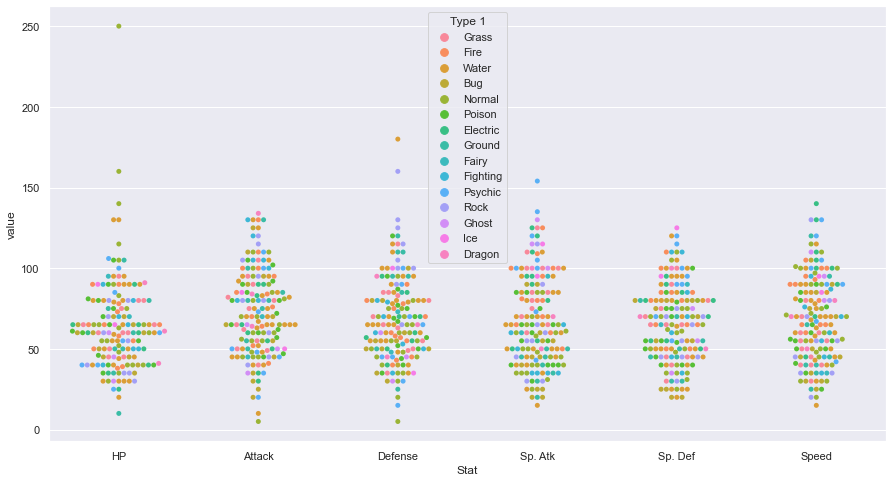

In [48]:
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


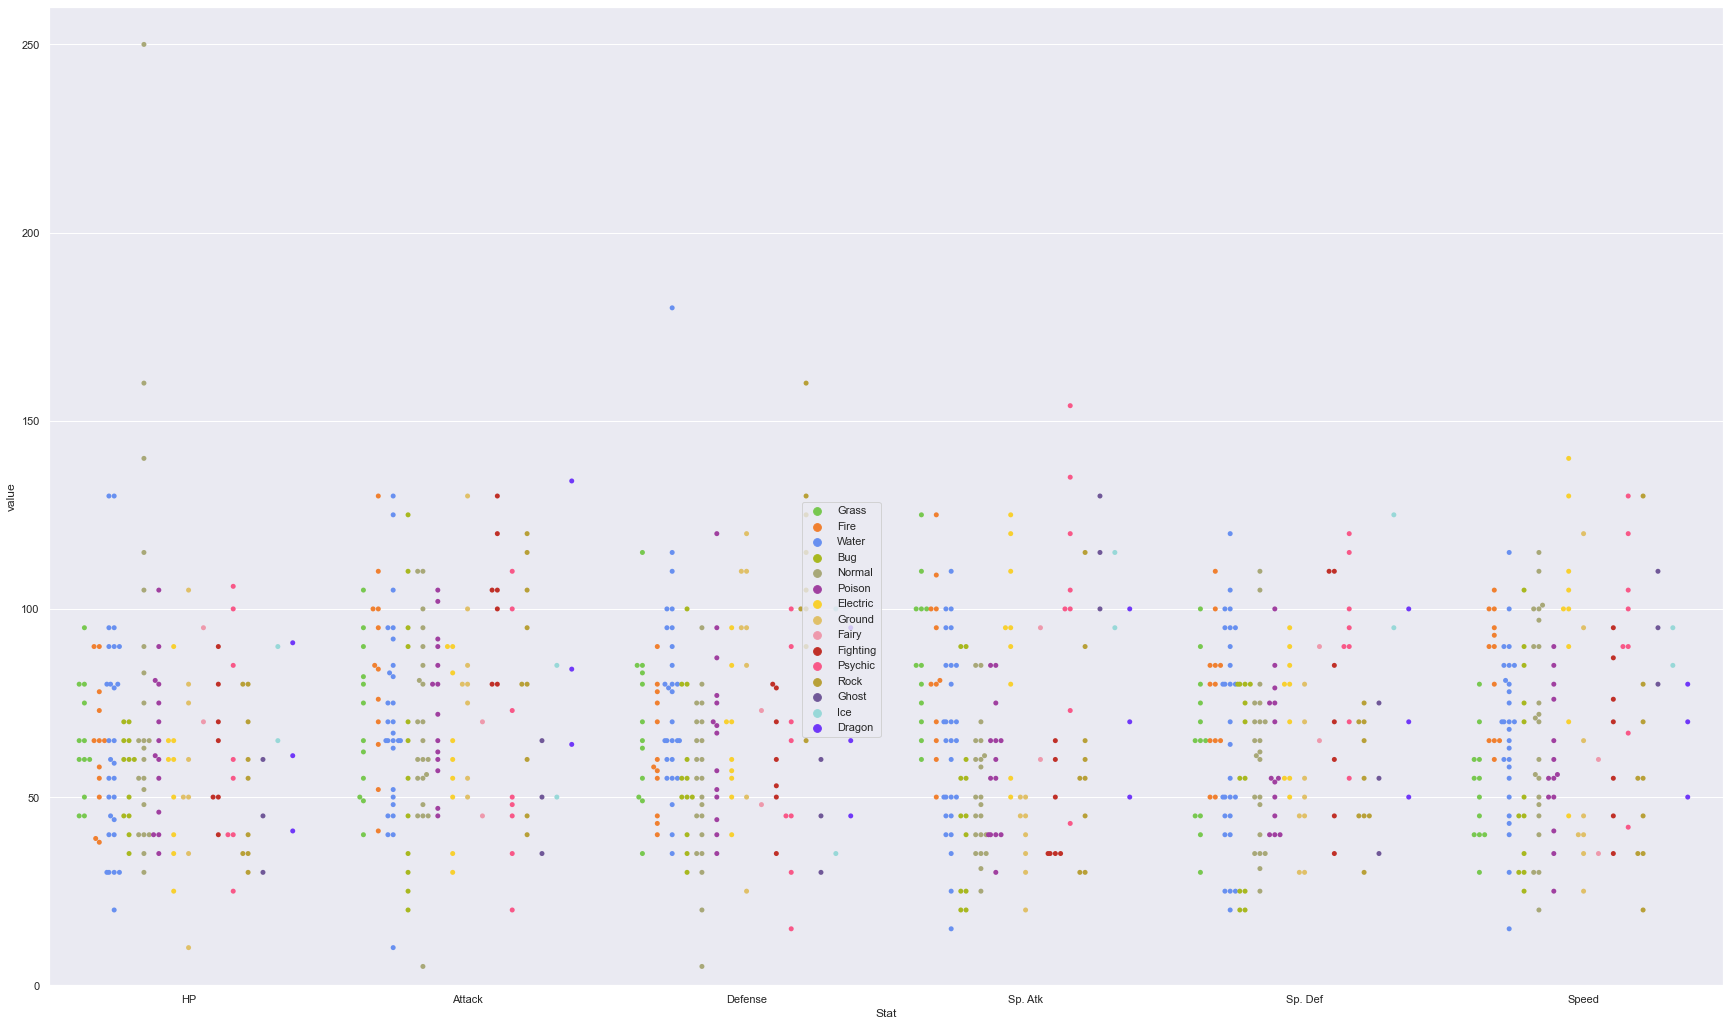

In [56]:
plt.figure(figsize=(30,18))
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1', dodge=True, palette=pkmn_type_colors)
plt.ylim(0, 260)
plt.legend(bbox_to_anchor=(0.5, 0.5), loc=1)

<AxesSubplot:>

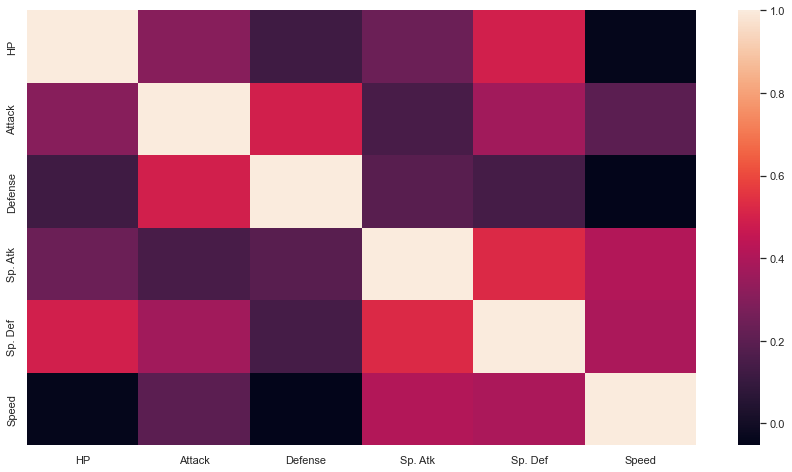

In [57]:
corr = stats_df.corr()
sns.heatmap(corr)

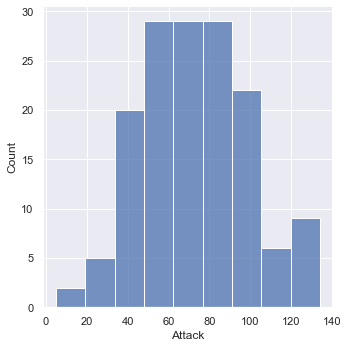

In [59]:
sns.displot(df.Attack)

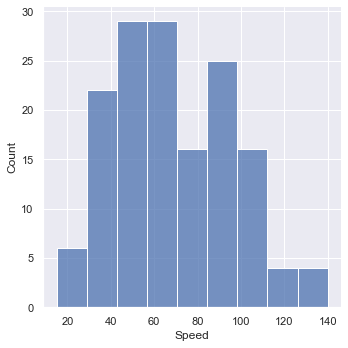

In [61]:
sns.displot(df.Speed)

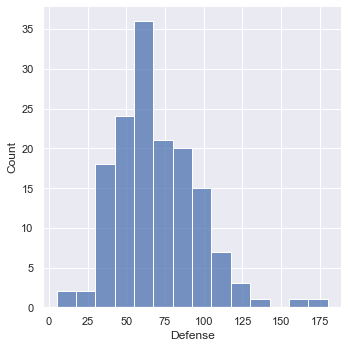

In [62]:
sns.displot(df.Defense)

<AxesSubplot:xlabel='Type 1', ylabel='count'>

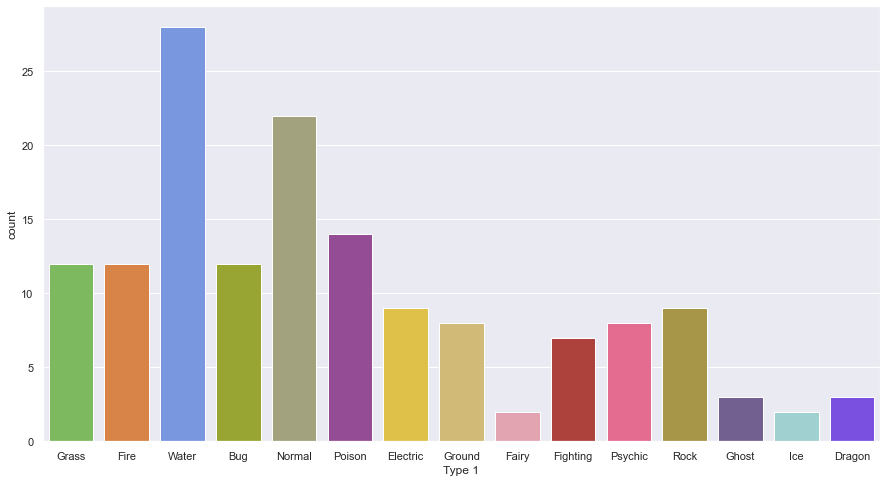

In [63]:
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

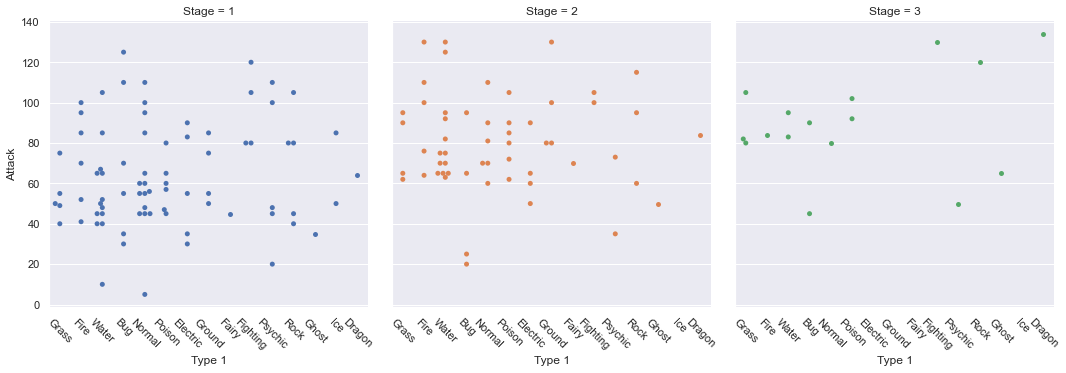

In [66]:
g = sns.catplot(x = 'Type 1', y = 'Attack', data = df, hue = 'Stage', col = 'Stage', kind = 'swarm')
g.set_xticklabels(rotation = -45)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

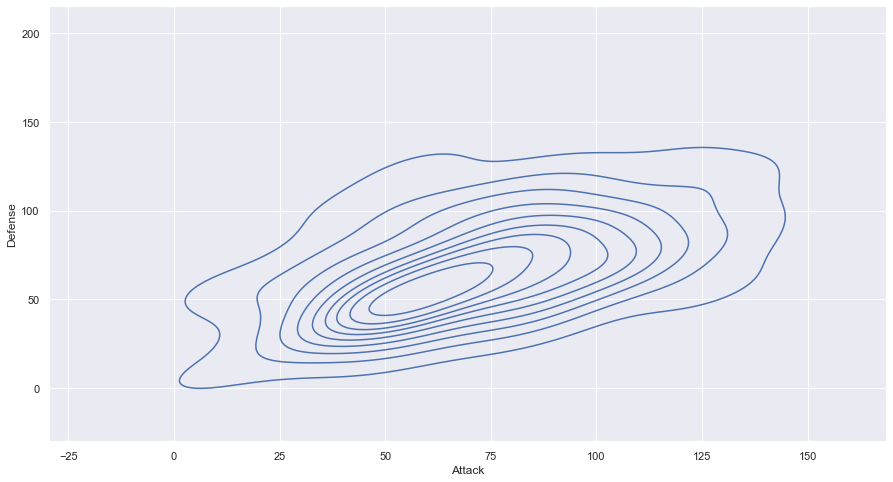

In [70]:
sns.kdeplot(df.Attack, df.Defense)

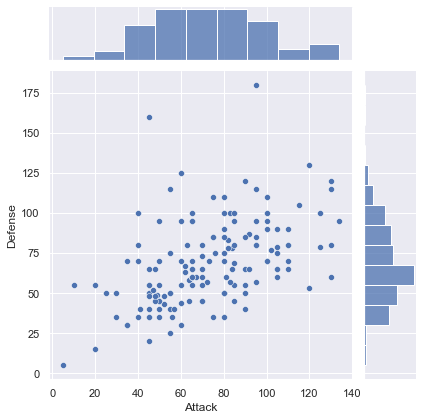

In [71]:
sns.jointplot(x = 'Attack', y = 'Defense', data = df)